<a href="https://colab.research.google.com/github/vicky1412/Predicting_stocks_using_deep_learning-using-realtime-/blob/main/realtime_1m_regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Load the Model

In [ ]:
Filename1 = '/content/drive/MyDrive/Option Trading/model-1m-regressor(current).pkl'
Filename2 = '/content/drive/MyDrive/Option Trading/model-1m-regressor(next).pkl'  
with open(Filename1, 'rb') as file:  
    modelcurrent = pickle.load(file)
with open(Filename2, 'rb') as file:  
    modelnext = pickle.load(file)

## Create API object

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange

API_Key = 'GICCCRW4PJWT0C9'
ts = ForeignExchange(key=API_Key,output_format='pandas')

In [ ]:
data = ts.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD', interval='1min', outputsize='full')[0]
data

In [ ]:
data['Close'].value_counts()

## Realtime

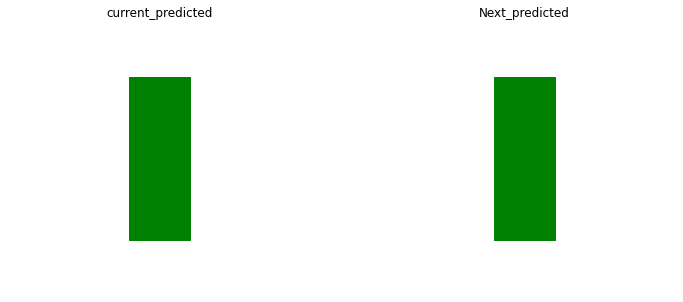

In [ ]:
data = ts.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD', interval='1min', outputsize='full')[0]
# Rename the columns
data.rename(columns = {'1. open':'Open'}, inplace = True)
data.rename(columns = {'2. high':'High'}, inplace = True)
data.rename(columns = {'3. low':'Low'}, inplace = True)
data.rename(columns = {'4. close':'Close'}, inplace = True)
# set Index
data['Index'] = np.arange(len(data))
data.set_index('Index',inplace=True)
# Add Diff column
def Diff_body(row):
  return abs(row['Open']-row['Close'])
def Diff_wick(row):
  return abs(row['High']-row['Low'])
# Get the color(candles)
data['Diff_body'] = data.apply (lambda row: Diff_body(row), axis=1)
data['Diff_wick'] = data.apply (lambda row: Diff_wick(row), axis=1)
final_data = data.iloc[data.index==3]
pd.options.display.float_format = '{:,.5f}'.format
# Predict
predictions_current = modelcurrent.predict(final_data)[0]
predictions_next = modelnext.predict(final_data)[0]

mse_current = 0.000164
mse_next = 0.000167

previous_close = final_data['Close'].values[0]

# Virtualize
fig, ax = plt.subplots(1,2,figsize=(12,5))
# Title
ax[0].set(title="current_predicted", xlabel="Height", ylabel="Width")
ax[1].set(title="Next_predicted", xlabel="Height", ylabel="Width")
# X and Y limit
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,5)
# hide grid
ax[0].grid(False)
ax[1].grid(False)
# hide axis
ax[0].axis('off')
ax[1].axis('off')

def rects(axx,ayy,width,height,cancolor):
  rect = matplotlib.patches.Rectangle((axx, ayy),width, height,color =cancolor)
  return rect

# predictions_current
if previous_close < (predictions_current - mse_current):
  rect = rects(2,1,1,3,'green')
  ax[0].add_patch(rect)
elif previous_close > (predictions_current + mse_current):
  rect = rects(2,1,1,3,'red')
  ax[0].add_patch(rect)
else:
  rect = rects(2,1,1,3,'black')
  ax[0].add_patch(rect)
# predictions_next
if previous_close < (predictions_next - mse_next):
  rect = rects(2,1,1,3,'green')
  ax[1].add_patch(rect)
elif previous_close > (predictions_next - mse_next):
  rect = rects(2,1,1,3,'red')
  ax[1].add_patch(rect)
else:
  rect = rects(2,1,1,3,'black')
  ax[1].add_patch(rect)

In [ ]:
final_data

,Open,High,Low,Close,Diff_body,Diff_wick
Index,,,,,,
3,1.17720,1.17721,1.17687,1.17702,0.00018,0.00034


In [ ]:
predictions_current,predictions_next

(1.185057855726753, 1.1850515167292968)